In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuron

In [2]:
def calc(tstop=300):

    # setup soma
    soma = neuron.h.Section(name="soma")
    soma.nseg = 1
    soma.diam = 10
    soma.L = 10
    soma.insert("hh")

    # setup dendrite
    ndend = 2
    dends = []
    for i in range(ndend):
        dend = neuron.h.Section()
        dend.nseg = 5
        dend.L = 300
        dend.diam = 0.5
        dend.Ra = 125
        dend.insert("pas")
        dend.connect(soma, 0)
        dends.append(dend)

    # setup stimulation to soma
    stim = neuron.h.IClamp(soma(0.5))
    stim.delay = 100
    stim.dur = 100
    stim.amp = 0.1

    # setup recorder
    rec_t = neuron.h.Vector()
    rec_t.record(neuron.h._ref_t)
    rec_v_array = []
    rec_v_array.append(neuron.h.Vector())
    rec_v_array[-1].record(soma(0.5)._ref_v)
    rec_v_array.append(neuron.h.Vector())
    rec_v_array[-1].record(dends[0](0.9)._ref_v)

    # initialize and run
    neuron.h.finitialize(-65)
    neuron.run(tstop)
    
    # convert recored information to ndarray
    t = np.array(rec_t.as_numpy())
    v_array = []
    for rec_v in rec_v_array:
        v_array.append(np.array(rec_v.as_numpy()))

    return t, v_array

In [3]:
def plot_voltage_array(t, v_array):
    for v in v_array:
        plt.plot(t, v)
    plt.xlabel("Time [ms]")
    plt.ylabel("Voltage [mV]")
    plt.axis(xmin=0, xmax=max(t), ymin=-80, ymax=50)
    plt.show()

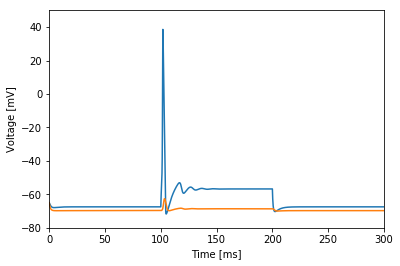

In [4]:
t, v_array = calc()
plot_voltage_array(t, v_array)